# Análisis de ventas de vehículos de segunda mano

Para nuestro proyecto, decidimos hacer un analisis de los datos de publicaciones de ventas de autos usados en toda España

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('coches-de-segunda-mano-sample.csv')


In [11]:
df.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


# Preprocesamiento
Primero, eliminamos las columnas que no usaremos para acelerar el computo y reducir la cantidad de memoria utilizada

In [12]:
df.drop(columns=['url', 'company', 'country'], inplace=True)
df.head()

,make,model,version,price,price_financed,fuel,year,kms,power,doors,shift,color,photos,is_professional,dealer,province,publish_date,insert_date
0,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,NaN,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,2020-12-18 10:47:13,2021-01-15 00:00:00
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,82.0,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,2021-01-02 11:25:40,2021-01-15 00:00:00
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,100.0,4,Manual,Blanco,10,True,Auto 96,Barcelona,2020-12-16 10:51:45,2021-01-15 00:00:00
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,140.0,4,Manual,Blanco,9,True,Inniauto,Navarra,2020-11-25 11:09:14,2021-01-15 00:00:00
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,130.0,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,2021-01-12 20:00:34,2021-01-15 00:00:00


## Calculo del precio medio de venta por cada marca en la muestra

Se considera relevante para el analisis el calculo del  precio medio de venta de todas las marcas de coches con la finalidad de conseguir una visión más clara de cuáles de ellas son las más caras y más baratas en el mercado de coches de segunda mano, kilómetro cero y seminuevos. 

In [ ]:
df2 = df.groupby('make')['price'].mean()
df2a = df2.reset_index()
df2a.columns = ['marca', 'precio_medio']

df2a.head()

In [ ]:
import plotly.express as px

fig = px.bar(df2a, x='marca', y='precio_medio', title="Precio medio de venta de vehiculos de segunda mano en España segun la marca",
            order,labels={'x':'Marca', 'y':'Precio Medio'})
fig.show()

## Provincias Líderes en Adopción de Vehículos Eléctricos

Se considera igualmente importante para el análisis conocer el porcentaje de vehículos eléctricos en comparación con el total de vehículos vendidos por provincia. Esto permitirá identificar las provincias que están mostrando una mayor adopción de la compra de coches eléctricos de segunda mano.

In [5]:
# Filtrar los vehículos eléctricos
electric_cars = df[df['fuel'] == 'Eléctrico']
electric_cars

,make,model,version,price,price_financed,fuel,year,kms,power,doors,shift,color,photos,is_professional,dealer,province,publish_date,insert_date
73,BMW,i3,BMW i3 5p.,15500,12900.0,Eléctrico,2016.0,49000,170.0,5,Automático,Blanco (blanco-negro),28,True,AUTOMOVILES YUMACAR S.L,Madrid,2020-12-20 19:37:42,2021-01-15 00:00:00
117,SMART,fortwo,SMART fortwo 60kW81CV EQ coupe 3p.,14500,14500.0,Eléctrico,2019.0,2000,82.0,3,Automático,Rojo,21,True,Automoviles 10 - Especialistas en Smart,Madrid,2020-12-30 05:23:08,2021-01-15 00:00:00
408,PEUGEOT,Partner,PEUGEOT Partner Furgon Confort Electric L1,23500,18500.0,Eléctrico,2020.0,10,67.0,3,Automático,Blanco,22,True,PSA Retail Orense,Orense,2021-01-14 16:56:46,2021-01-15 00:00:00
532,SMART,fortwo,SMART fortwo 60kW81CV EQ coupe 3p.,26920,25950.0,Eléctrico,2020.0,1,82.0,3,Automático,Negro,21,True,Citycar Sur,Madrid,2020-12-24 17:47:29,2021-01-15 00:00:00
630,DS,DS 3 Crossback E-Tense,DS DS 3 Crossback ETense 50 kWh Performance Li...,38102,37402.0,Eléctrico,2021.0,1,136.0,5,Automático,Gris / Plata,4,True,MAAS EXCLUSIVAS PONT,Barcelona,2021-01-14 12:25:00,2021-01-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49033,HONDA,Honda e,HONDA Honda e Advance Llantas 16 5p.,25900,NaN,Eléctrico,2020.0,5000,154.0,5,Automático,Blanco,6,False,1fd2a8a65c9ac9cd3e64954f4f44bcf8,Madrid,2021-01-04 23:55:43,2021-01-15 00:00:00
49412,RENAULT,Zoe,RENAULT Zoe Life 40 R90 5p.,19900,18400.0,Eléctrico,2019.0,1100,92.0,5,Automático,Blanco,21,True,Vearsa,Zaragoza,2020-12-26 19:03:50,2021-01-15 00:00:00
49429,NISSAN,LEAF,NISSAN LEAF 40kWh Tekna ProPilot Park 5p.,32250,30250.0,Eléctrico,2019.0,2500,150.0,5,Automático,Blanco,26,True,"NISSAN Barbera, Granollers, Terrassa, Igualada...",Barcelona,2021-01-10 19:45:39,2021-01-15 00:00:00
49571,CITROEN,C-Zero,CITROEN CZero Seduction 5p.,8900,7900.0,Eléctrico,2017.0,58250,67.0,5,Automático,Blanco,16,True,I Cars,Valencia,2021-01-11 22:12:42,2021-01-15 00:00:00


In [6]:
# Calcular el total de vehículos y los eléctricos por provincia
total_by_province = df['province'].value_counts()
total_by_province

province
Madrid         9638
Barcelona      5856
Valencia       3533
Sevilla        2552
Málaga         2303
Alicante       2103
Vizcaya        1392
Murcia         1364
Las Palmas     1136
Zaragoza       1055
A Coruña        993
Pontevedra      956
Granada         890
Tarragona       872
Asturias        864
Baleares        743
Tenerife        727
Badajoz         722
Toledo          705
Girona          650
Navarra         649
Castellón       641
Córdoba         616
Cádiz           605
Valladolid      589
Cantabria       560
Guipúzcoa       526
Jaén            489
Burgos          487
Almería         481
Salamanca       471
Lleida          469
Ciudad Real     445
Álava           409
Albacete        375
Lugo            369
Huelva          366
León            357
Cáceres         326
La Rioja        302
Orense          237
Guadalajara     188
Huesca          163
Ávila           143
Cuenca          133
Zamora          121
Segovia         120
Palencia        112
Teruel          109
Soria      

In [7]:
electric_by_province = electric_cars['province'].value_counts()
electric_by_province

province
Madrid         150
Barcelona       72
Valencia        33
Vizcaya         21
Málaga          16
Murcia          15
Asturias        14
Zaragoza        14
Sevilla         14
Pontevedra      13
Alicante        13
A Coruña        11
Toledo          11
Girona          10
Álava           10
Tarragona        9
Burgos           9
Las Palmas       9
Cádiz            9
Guipúzcoa        7
Castellón        7
Salamanca        6
Cáceres          6
Lleida           6
Córdoba          6
Segovia          5
Valladolid       5
Cantabria        5
Baleares         5
Zamora           5
Orense           4
Navarra          4
Tenerife         3
Badajoz          3
Ciudad Real      3
León             3
Jaén             3
Albacete         3
Lugo             2
Guadalajara      2
Ávila            2
Granada          2
Almería          2
Huelva           2
La Rioja         1
Soria            1
Cuenca           1
Huesca           1
Name: count, dtype: int64

In [9]:
# Crear el DataFrame con los datos procesados
province_analysis = pd.DataFrame({
    'Total Vehicles': total_by_province,
    'Electric Vehicles': electric_by_province,
    'Percentage Electric': electric_by_province / total_by_province
    
})

# Rellenar valores faltantes y calcular el porcentaje
province_analysis['Electric Vehicles'] = province_analysis['Electric Vehicles'].fillna(0)
province_analysis['Percentage Electric'] = (
    province_analysis['Electric Vehicles'] / province_analysis['Total Vehicles'] * 100
)

province_analysis

,Total Vehicles,Electric Vehicles,Percentage Electric
province,,,
A Coruña,993,11.0,1.107754
Albacete,375,3.0,0.800000
Alicante,2103,13.0,0.618165
Almería,481,2.0,0.415800
Asturias,864,14.0,1.620370
Badajoz,722,3.0,0.415512
Baleares,743,5.0,0.672948
Barcelona,5856,72.0,1.229508
Burgos,487,9.0,1.848049


In [20]:
# Top 10 Provincias con mayor Porcentaje de Vehículos Eléctricos 
top_provinces = province_analysis.sort_values('Percentage Electric', ascending=False).head(10)
top_provinces

,Total Vehicles,Electric Vehicles,Percentage Electric
province,,,
Segovia,120,5.0,4.166667
Zamora,121,5.0,4.132231
Álava,409,10.0,2.444988
Soria,53,1.0,1.886792
Burgos,487,9.0,1.848049
Cáceres,326,6.0,1.840491
Orense,237,4.0,1.687764
Asturias,864,14.0,1.620370
Toledo,705,11.0,1.560284


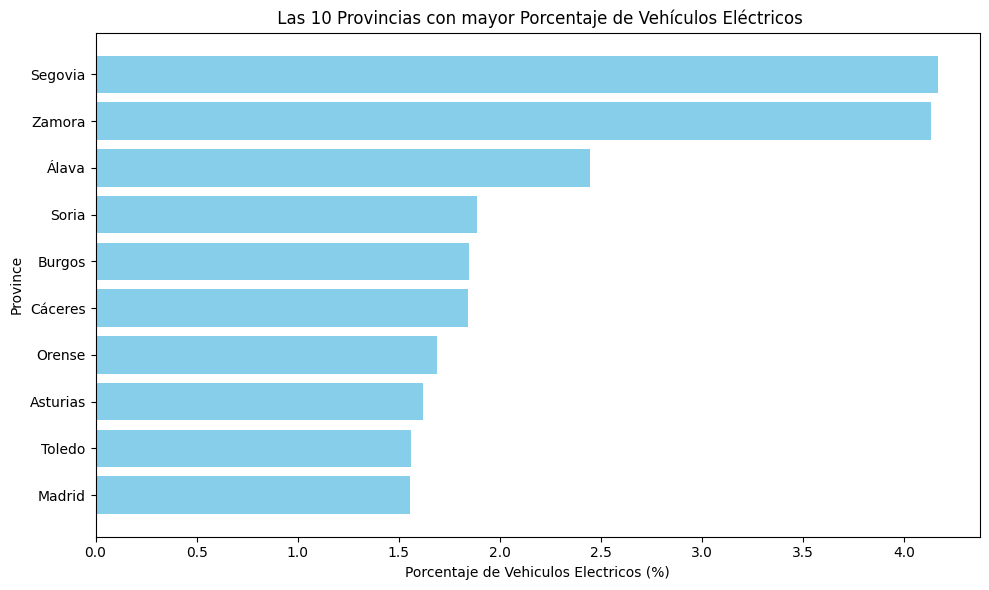

In [ ]:
# Grafico de Barras
plt.figure(figsize=(10, 6))
plt.barh(top_provinces.index, top_provinces['Percentage Electric'], color='skyblue')
plt.xlabel('Porcentaje de Vehiculos Electricos (%)')
plt.ylabel('Province')
plt.title(' Las 10 Provincias con mayor Porcentaje de Vehículos Eléctricos')
plt.gca().invert_yaxis()  # Invert eje y para mejor legibilidad
plt.tight_layout()
plt.show()

Como se puede observar el porcentaje de vehiculos electricos por provincia es sumamente pequeño lo cual estaria indicando que España al menos hasta donde esta recogida la data no tenia una buena adopcion de compra de coches electricos de segunda mano. 

## Distribución de Vehículos Eléctricos 

Para complementar lo mencionado anteriormente, es igualmente relevante analizar la distribución de coches eléctricos en las 10 provincias con el mayor porcentaje de vehículos eléctricos de segunda mano comprados.

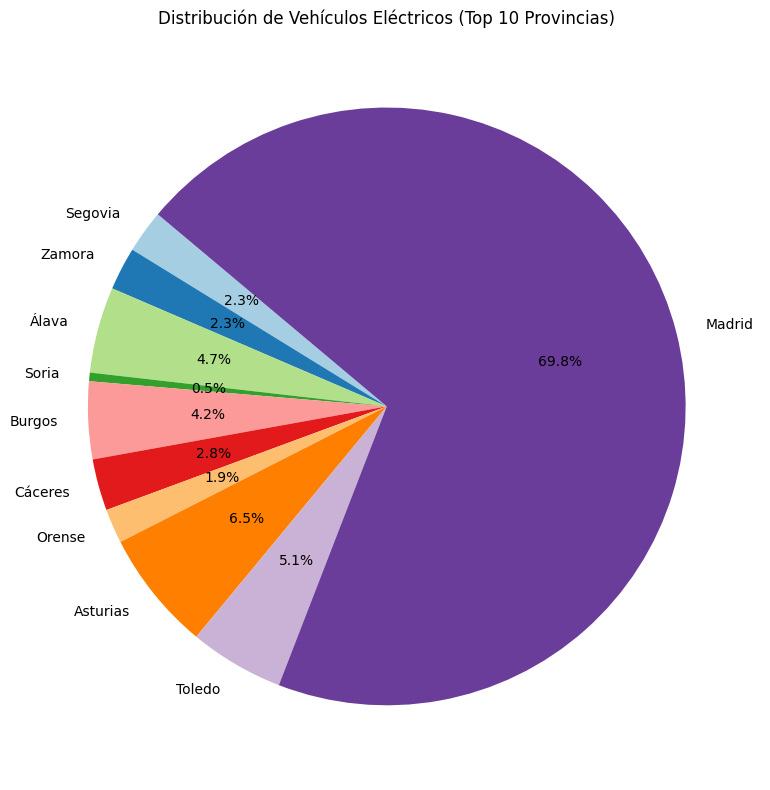

In [21]:
plt.figure(figsize=(8, 8))
plt.pie(
    top_provinces['Electric Vehicles'],
    labels=top_provinces.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Distribución de Vehículos Eléctricos (Top 10 Provincias)')
plt.tight_layout()
plt.show()

Como se puede observar en el gráfico anterior, Madrid destaca en comparación con el resto por tener el mayor porcentaje basado en la cantidad de coches eléctricos vendidos. Sin embargo, en el apartado anterior se señaló que no era una de las provincias con el mayor porcentaje de vehículos eléctricos en relación con el total de coches por provincia.